In [2]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
import pykat.ifo.aligo as aligo
import pykat.ifo.aligo.plot as aligoplt

%matplotlib inline               
pykat.init_pykat_plotting(dpi=90)

from LLONoSQZ import make_LLO2

                                              ..-
    PyKat 1.2.73          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [3]:
base = make_LLO2(verbose=False)
base.parse("""
#const Mitmy 39.420 
#const Metmy 39.642
#const Mitmx 39.603
#const Metmx 39.508

#attr ITMY mass $Mitmy zmech sus1
#attr ETMY mass $Metmy zmech sus1
#attr ITMX mass $Mitmx zmech sus1
#attr ETMX mass $Metmx zmech sus1

#tf sus1 1 0 p $mech_fres $mech_Q
#const mech_fres 1
#const mech_Q 1M
""")

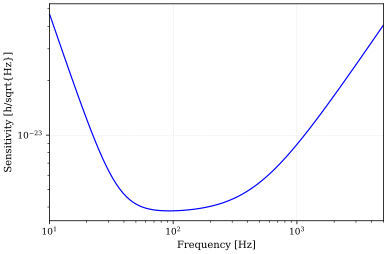

In [3]:
base1 = base.deepcopy()
base1 = aligo.setup(base1)
aligoplt.strain_sensitivity(base1, plot_cmds={'label':'after setup()'});

In [4]:
base1.DARM_lock.accuracy, base1.CARM_lock.accuracy, base1.PRCL_lock.accuracy, base1.SRCL_lock.accuracy, \
base1.MICH_lock.accuracy

(0.0034, 0.071, 2.1e-05, 0.015, 1.9e-05)

In [5]:
base2 = base.deepcopy()
base2 = aligo.setup(base2)
base2.DARM_lock.accuracy = 1e-9
base2.CARM_lock.accuracy = 1e-9
base2.PRCL_lock.accuracy = 1e-9
base2.SRCL_lock.accuracy = 1e-9
base2.MICH_lock.accuracy = 1e-9

base2.parse("qnoisedS NSR 1 $fs {node}".format(node=base2.IFO.DARM_h.port.nodeName[0]))
lower=5
upper=5000
steps=100
out = base2.IFO.DARM_h.scan_f(
        linlog="log", lower=lower, upper=upper, steps=steps)

# np.save("./strain_sensitivityF2WithoutSQZ.npy", out["NSR"]) 

In [17]:
DBSDebug = base.deepcopy()
DBSDebug = aligo.setup(DBSDebug)
DBSDebug.parse("""
bp DBS1 x g nFI2a
bp DBS2 x g nFI2b 
bp DBS3 x g nFI2c
bp DBS4 x g nFI2d
""")
DBSDebug.noxaxis = True
outDebug = DBSDebug.run()
outDebug['DBS2']-outDebug['DBS1'], outDebug['DBS3']-outDebug['DBS1'], outDebug['DBS4']-outDebug['DBS1']

(0.0, 0.0, 2.27829328114898)

In [6]:
out["NSR"].mean()

2.1762036349245537e-23

In [7]:
2.1762047242901346e-23

2.1762047242901346e-23

In [8]:
base2.ITMX.zmech, base2.ITMX.zmech, base2.ITMX.zmech, base2.ITMX.zmech, 

(<AttrParam (ITMX.zmech=sus1) at 0x127a0e5d0>,
 <AttrParam (ITMX.zmech=sus1) at 0x127a0e5d0>,
 <AttrParam (ITMX.zmech=sus1) at 0x127a0e5d0>,
 <AttrParam (ITMX.zmech=sus1) at 0x127a0e5d0>)

In [9]:
base2.MICH_lock

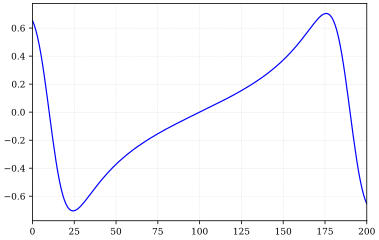

In [16]:
kat = pykat.finesse.kat()
kat.verbose=False
kat.maxtem=0

kat.parse("""
%%% FTblock laser
l L0 40.0 0.0 0.0 ni
bs jitter 1.0 0.0 0.0 0.0 ni n0 dump dump
s lmod1 1.0 n0 n1
mod mod1 9099055.0 0.13 1 pm 0.0 n1 n2
s lmod2 1.0 n2 n3
mod mod2 45495275.0 0.139985 1 pm 0.0 n3 nLaserOut
%%% FTend laser


%%% FTblock PRC
s mod2PRMAR 0 nLaserOut nPRMAR

m PRMAR 0.0 0.99996255 0.0 nPRMAR nPRMs1
s sPRMsub1 0.0737 1.44963098985906 nPRMs1 nPRMs2
m PRM 0.9687641 0.03123 0.0 nPRMs2 nPRM2
attr PRM Rcx 11.009
attr PRM Rcy 11.009
s lp1 16.6107 nPRM2 nPR2a
bs PR2 0.9997484 0.000243 0.0 -0.79 nPR2a nPR2b nPOP nAPOP
attr PR2 Rcx -4.545
attr PR2 Rcy -4.545
s lp2 16.1648 nPR2b nPR3a
bs PR3 0.9999777 5.3e-06 0.0 0.615 nPR3a nPR3b dump dump
attr PR3 Rcx 36.027
attr PR3 Rcy 36.027
s lp3 19.538 nPR3b nPRBS
%%% FTend PRC

%%% FTblock BS
bs BS 0.4999914 0.5 0.0 45.0 nPRBS nYBS nBSi1 nBSi3
s BSsub1 0.06886879047885076 1.44963098985906 nBSi1 nBSi2
s BSsub2 0.06886879047885076 1.44963098985906 nBSi3 nBSi4
bs BSAR1 0.0 0.9999683 0.0 29.19503312266288 nBSi2 dump14 nXBS nPOX
bs BSAR2 0.0 0.9999683 0.0 -29.19503312266288 nBSi4 dump15 nSRBS dump16
%%% FTend BS

%%% FTblock Yarm
s ly1 5.0119775952958046 nYBS nITMY1a
lens* ITMY_lens 2.898550724637681e-05 nITMY1a nITMY1b
s sITMY_th2 0.0 nITMY1b nITMY1
m ITMYAR 0.0 0.9997494 0.0 nITMY1 nITMYs1
s ITMYsub 0.19929 1.44963098985906 nITMYs1 nITMYs2
m ITMY 0.9851734999999999 0.0148 0.0 nITMYs2 nITMY2
attr ITMY Rcx -1940.7
attr ITMY Rcy -1940.7
attr ITMY mass 39.42
s LY 3994.485 nITMY2 nETMY1
m ETMY 0.9999561 3.9e-06 0.0 nETMY1 nETMYs1
attr ETMY Rcx 2245.4
attr ETMY Rcy 2245.4
attr ETMY mass 39.642
s ETMYsub 0.20035 1.44963098985906 nETMYs1 nETMYs2
m ETMYAR 0.0 0.9999984 0.0 nETMYs2 nPTY
%%% FTend Yarm

%%% FTblock Xarm
s lx1 4.9946225583947905 nXBS nITMX1a
lens* ITMX_lens 2.898550724637681e-05 nITMX1a nITMX1b
s sITMX_th2 0.0 nITMX1b nITMX1
m ITMXAR 0.0 0.9998355 0.0 nITMX1 nITMXs1
s ITMXsub 0.19996 1.44963098985906 nITMXs1 nITMXs2
m ITMX 0.985174 0.0148 0.0 nITMXs2 nITMX2
attr ITMX Rcx -1937.9
attr ITMX Rcy -1937.9
attr ITMX mass 39.603
s LX 3994.485 nITMX2 nETMX1
m ETMX 0.999956 4e-06 0.0 nETMX1 nETMXs1
attr ETMX Rcx 2247.71
attr ETMX Rcy 2247.71
attr ETMX mass 39.508
s ETMXsub 0.19951 1.44963098985906 nETMXs1 nETMXs2
m ETMXAR 0.0 0.999986 0.0 nETMXs2 nPTX
%%% FTend Xarm

%%% FTblock SRC
s ls3 19.3659 nSRBS nSR3b
bs SR3 0.9999758999999999 5e-06 0.0 0.785 nSR3b nSR3a dump dump
attr SR3 Rcx 35.97
attr SR3 Rcy 35.97
attr SR3 mass 12.069
s ls2 15.4435 nSR3a nSR2b
bs SR2 0.9999756 1.83e-05 0.0 -0.87 nSR2b nSR2a dump dump
attr SR2 Rcx -6.406
attr SR2 Rcy -6.406
attr SR2 mass 2.888
s ls1 15.7562 nSR2a nSRM1
m SRM 0.6759925999999999 0.324 90.0 nSRM1 nSRMs1
attr SRM Rcx -5.673
attr SRM Rcy -5.673
attr SRM mass 2.898
s SRMsub 0.07478 1.44963098985906 nSRMs1 nSRMs2
m SRMAR 0.0 0.99997794 0.0 nSRMs2 nSRM2
s sSRM_FI 0.9078 nSRM2 nFI2a
%%% FTend SRC

%%% FTblock FI
dbs FI2 nFI2a nFI2b nFI2c nFI2d
s sFI_OM1 2.51281 nFI2c nOM1a
bs OM1 0.9991625 0.0008 0.0 2.251 nOM1a nOM1b nOM1c dump22
attr OM1 Rcx 4.6
attr OM1 Rcy 4.6
s sOM1_OM2 1.395 nOM1b nOM2a
bs OM2 0.9999525 1e-05 0.0 4.399 nOM2a nOM2b nOM2c nOM2d
attr OM2 Rcx 1.7058
attr OM2 Rcy 1.7058
s sOM2_OM3 0.64 nOM2b nOM3a
bs OM3 0.9899625 0.01 0.0 30.037 nOM3a nOM3b nOM3c nOM3d
s sOM3_OMC 0.31525000000000003 nOM3b nOMC_ICa
%%% FTend FI

%%% FTblock OMC
bs1 OMC_IC 0.0076 1e-05 0.0 2.7609 nOMC_ICa nOMC_ICb nOMC_ICc nOMC_ICd
s lIC_OC 0.2815 nOMC_ICc nOMC_OCa
bs1 OMC_OC 0.0075 1e-05 0.0 4.004 nOMC_OCa nOMC_OCb nAS nOMC_OCd
s lOC_CM1 0.2842 nOMC_OCb nOMC_CM1a
bs1 OMC_CM1 3.6e-05 1e-05 0.0 4.004 nOMC_CM1a nOMC_CM1b nOMC_CM1c nOMC_CM1d
attr OMC_CM1 Rcx 2.57321
attr OMC_CM1 Rcy 2.57321
s lCM1_CM2 0.2815 nOMC_CM1b nOMC_CM2a
bs1 OMC_CM2 3.59e-05 1e-05 0.0 4.004 nOMC_CM2a nOMC_CM2b nOMC_CM2c nOMC_CM2d
attr OMC_CM2 Rcx 2.57369
attr OMC_CM2 Rcy 2.57369
s lCM2_IC 0.2842 nOMC_CM2b nOMC_ICd
%%% FTend OMC

%%% FTblock cavities
#cav cavIMC MC2 nMC2in MC2 nMC2refl
cav cavXARM ITMX nITMX2 ETMX nETMX1
cav cavYARM ITMY nITMY2 ETMY nETMY1
cav cavSRX SRM nSRM1 ITMX nITMXs2
cav cavSRY SRM nSRM1 ITMY nITMYs2
cav cavPRX PRM nPRM2 ITMX nITMXs2
cav cavPRY PRM nPRM2 ITMY nITMYs2
cav cavOMC OMC_IC nOMC_ICc OMC_IC nOMC_ICd
%%% FTend cavities

var scan 0.0
set scanre scan re
xaxis scan re lin -100 100 200
noplot scSRM
func scSRM = (1) * (-1) * $scanre
put SRM phi $scSRM
pd1 REFL_f2_I 45495275.0 14.0 nPRMAR
yaxis abs
time
gnuterm no
pyterm no


""")
plt.plot(kat.run()["REFL_f2_I"]);

In [17]:
base1 = base.deepcopy()
base1.maxtem=0
o1 = base1.IFO.CARM.scan(xlimits=[-100, 100], steps=200)
o2 = base1.IFO.DARM.scan(xlimits=[-1, 1], steps=200)
o3 = base1.IFO.SRCL.scan(xlimits=[-100, 100], steps=200)
o4 = base1.IFO.PRCL.scan(xlimits=[-10, 10], steps=200)
o5 = base1.IFO.MICH.scan(xlimits=[-10, 10], steps=200)

In [18]:
print(o3.katScript)

% Generated by PyKat 10.02.2022 12:10:47

%%% FTblock laser
l L0 40.0 0.0 0.0 ni
bs jitter 1.0 0.0 0.0 0.0 ni n0 dump dump
s lmod1 1.0 n0 n1
mod mod1 9099055.0 0.13 1 pm 0.0 n1 n2
s lmod2 1.0 n2 n3
mod mod2 45495275.0 0.139985 1 pm 0.0 n3 nLaserOut
%%% FTend laser

%%% FTblock IMC
s sIMCin 0.0 nLaserOut nMC1in
bs1 MC1 0.006 0.0 0.0 44.59 nMC1in nMC1refl nMC1trans nMC1fromMC3
s sMC1_MC2 16.24057 nMC1trans nMC2in
bs1 MC2 0.0 0.0 0.0 0.82 nMC2in nMC2refl nMC2trans dump
attr MC2 Rcx 27.24
attr MC2 Rcy 27.24
s sMC2_MC3 16.24057 nMC2refl nMC3in
bs1 MC3 0.006 0.0 0.0 44.59 nMC3in nMC3refl nMC3trans nMCreturn_refl
s sMC3substrate 0.0845 1.44963098985906 nMC3trans nMC3ARin
bs2 MC3AR 0.0 0.0 0.0 28.9661 nMC3ARin dump nIMCout dump
s sMC3_MC1 0.465 nMC3refl nMC1fromMC3
%%% FTend IMC

%%% FTblock HAM2
s sHAM2in 0.4282 nIMCout nIM11
bs1 IM1 0.0 0.0 0.0 53.0 nIM11 nIM12 dump dump
s sIM1_IM2 1.2938 nIM12 nIM21
bs1 IM2 0.0 0.0 0.0 7.0 nIM21 nIM22 dump dump
attr IM2 Rcx 12.8
attr IM2 Rcy 12.8
s sIM2_FI 

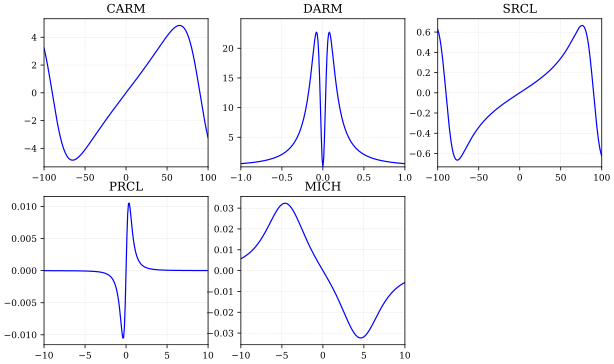

In [19]:
DOFs = ["CARM", "DARM", "SRCL", "PRCL", "MICH"]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

index = 0
errorSignals = []
for i in range(2):
    for j in range(3):
        if index > 4:
            axes[i, j].spines['top'].set_visible(False)
            axes[i, j].spines['right'].set_visible(False)
            axes[i, j].spines['bottom'].set_visible(False)
            axes[i, j].spines['left'].set_visible(False)
            axes[i, j].get_xaxis().set_ticks([])
            axes[i, j].get_yaxis().set_ticks([])
            break
            
        out = eval(f"o{index+1}")
        
        errorSignals.append(out.y[:,0])
        axes[i, j].set_title(DOFs[index])
        axes[i, j].plot(out.x, out.y[:,0])  
        axes[i, j].set_ylim(out.y[:,0].min()*(1+0.1), out.y[:,0].max()*(1+0.1))
        index += 1
        
# np.save("./errorSignals.npy", np.array(errorSignals))

In [52]:
base1 = base.deepcopy()
base1 = aligo.setup(base1)
# base1.REFL_f1_I.phase1.value = 0# CARM
# base1.POP_f1_I.phase1.value = 0# PRCL
# base1.POP_f2_Q.phase1.value = 0# MICH
# # base1.REFL_f1_I.phase1.value = # DARM
# base1.REFL_f2_I.phase1.value = 0# SRCL
# errorSignals = aligoplt.error_signals(base1, verbose=False);

print("CARM: ", base1.CARM_lock.accuracy, base1.CARM_lock.gain, base1.REFL_f1_I.phase1.value)
print("PRCL: ", base1.PRCL_lock.accuracy, base1.PRCL_lock.gain, base1.POP_f1_I.phase1.value)
print("MICH: ", base1.MICH_lock.accuracy, base1.MICH_lock.gain, base1.POP_f2_Q.phase1.value)
print("DARM: ", base1.DARM_lock.accuracy, base1.DARM_lock.gain, 0)
print("SRCL: ", base1.SRCL_lock.accuracy, base1.SRCL_lock.gain, base1.REFL_f2_I.phase1.value)

CARM:  0.071 -2.4e-06 101.0
PRCL:  2.1e-05 -16.0 101.0
MICH:  1.9e-05 91.0 103.0
DARM:  0.0034 -0.005 0
SRCL:  0.015 0.29 14.0


    Detectors: error signal

    POP_f1_I: PRCL_err
    REFL_f1_I: CARM_err
    POP_f2_Q: MICH_err
    REFL_f2_I: SRCL_err
    P_DC_OMC: OMC_DC -> DARM_err

In [9]:
# np.save("./errorSignals.npy", np.array(errorSignals))